In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:
# Загрузка данных
df = pd.read_csv('data.csv')

In [38]:
# Предобработка данных (Сортировка, удаление лишних столбцов, не представляющих ценности для решения бизнес-задачи)
df = df[['Primary Keywords', 'Secondary Keywords', 'Long-Tail Keywords', 'Social Media Source', 'Media Type', 'Organic_Traffic', 'CTR (%)', 'Average_Position', 'Domain_Authority', 'Conversion_Rate (%)', 'Goal_Completions', 'Top_Landing_Pages', 'CPC_for_Paid_Keywords ($)', 'Mobile_vs_Desktop_Traffic_Split (%)', 'Organic_Revenue ($)']]
df.head()

Primary Keywords                      Secondary Keywords  \
0  eco-friendly accessories  athleisure for eco-conscious consumers   
1   recycled fabric dresses                 eco-friendly sportswear   
2  eco-friendly accessories                    green fashion trends   
3  eco-friendly accessories                  sustainable activewear   
4     eco-friendly clothing  athleisure for eco-conscious consumers   

                 Long-Tail Keywords Social Media Source   Media Type  \
0  sustainable fashion for athletes             YouTube        Video   
1         carbon-neutral activewear           Instagram  Infographic   
2    biodegradable outdoor clothing           Instagram       Shorts   
3         carbon-neutral activewear           Instagram       Shorts   
4         carbon-neutral activewear           Instagram    Blog post   

   Organic_Traffic  CTR (%)  Average_Position  Domain_Authority  \
0           7965.0     3.14             46.44              45.0   
1           6553.0     1.43             31.60              71.0   
2           1982.0     3.45             36.20              42.0   
3           6363.0     0.96             30.98              58.0   
4           8720.0     8.30              9.93              14.0   

   Conversion_Rate (%)  Goal_Completions Top_Landing_Pages  \
0                 6.80             246.0     Category Page   
1                 3.50             131.0          Homepage   
2                12.36              98.0          Homepage   
3                 3.98             454.0         Blog Post   
4                 7.88             128.0          Homepage   

   CPC_for_Paid_Keywords ($)  Mobile_vs_Desktop_Traffic_Split (%)  \
0                       6.34                                72.46   
1                       7.94                                89.91   
2                       5.47                                57.33   
3                       2.25                                66.45   
4                       3.52                                53.83   

   Organic_Revenue ($)  
0              3597.90  
1              5806.19  
2              1170.33  
3              1182.17  
4               692.14

In [39]:
# Базовая статистика
df.describe()

Organic_Traffic      CTR (%)  Average_Position  Domain_Authority  \
count      9996.000000  9996.000000       9996.000000       9996.000000   
mean       5045.233994     5.312674         25.185706         49.671669   
std        2837.551879     2.745068         14.211421         23.220733   
min         100.000000     0.500000          1.000000         10.000000   
25%        2579.500000     2.947500         12.610000         30.000000   
50%        5091.000000     5.350000         24.945000         50.000000   
75%        7473.000000     7.720000         37.560000         70.000000   
max        9999.000000    10.000000         50.000000         89.000000   

       Conversion_Rate (%)  Goal_Completions  CPC_for_Paid_Keywords ($)  \
count          9996.000000       9996.000000                9996.000000   
mean              7.809134        256.846138                   5.180741   
std               4.189732        141.846836                   2.743066   
min               0.500000         10.000000                   0.500000   
25%               4.130000        133.000000                   2.800000   
50%               7.850000        259.500000                   5.145000   
75%              11.440000        380.000000                   7.520000   
max              15.000000        499.000000                  10.000000   

       Mobile_vs_Desktop_Traffic_Split (%)  Organic_Revenue ($)  
count                          9996.000000          9996.000000  
mean                             70.028652          5038.863073  
std                              11.465030          2873.147070  
min                              50.000000           101.470000  
25%                              60.087500          2536.270000  
50%                              70.130000          5094.800000  
75%                              79.820000          7487.325000  
max                              89.990000          9999.770000

In [40]:
# Проверка на пропущенные значения
df.isnull().sum()

Primary Keywords                       1
Secondary Keywords                     1
Long-Tail Keywords                     1
Social Media Source                    1
Media Type                             1
Organic_Traffic                        1
CTR (%)                                1
Average_Position                       1
Domain_Authority                       1
Conversion_Rate (%)                    1
Goal_Completions                       1
Top_Landing_Pages                      1
CPC_for_Paid_Keywords ($)              1
Mobile_vs_Desktop_Traffic_Split (%)    1
Organic_Revenue ($)                    1
dtype: int64

In [41]:
#Удаляем пропущенные значения
df = df.dropna()

In [43]:
#Изучение датасета для понимания наличия пропущенных значений
df.info()
# Вывод: теперь пропущенных значений нет, можно работать со всеми данными в таблице

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9995
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Primary Keywords                     9996 non-null   object 
 1   Secondary Keywords                   9996 non-null   object 
 2   Long-Tail Keywords                   9996 non-null   object 
 3   Social Media Source                  9996 non-null   object 
 4   Media Type                           9996 non-null   object 
 5   Organic_Traffic                      9996 non-null   float64
 6   CTR (%)                              9996 non-null   float64
 7   Average_Position                     9996 non-null   float64
 8   Domain_Authority                     9996 non-null   float64
 9   Conversion_Rate (%)                  9996 non-null   float64
 10  Goal_Completions                     9996 non-null   float64
 11  Top_Landing_Pages                  

В связи с тем, что все категориальные показатели в преобразованном датасете имеют в среднем 5-7 категорий, то наиболее предпочтительным способом категориальной кодировки будет label encoding, который присвоит каждой из них порядковый номер, что будет использовано в машинном обучении дальше.

ВАРИАНТ ДЛЯ ПОСЛЕДУЮЩЕЙ КОДИРОВКИ В СЛУЧАЕ КЛАССИФИКАЦИИ (На данный момент основной выбрана регрессия):
Целевой переменной является CPC как основной показатель эффективности рекламы на рынке интернет-торговли одеждой среди имеющегося датасета, т.к. основная цель бизнеса - извлечение прибыли, что напрямую связано с минимизацией расходов и максимизацией доходов. Данное соотношение объединяет CPC как основной показатель того, что лид кликнет на рекламу, купит что-то и принесет доход. Определеяется по формуле: CPC = Рекламный бюджет / кол-во кликов. При этом , чем CPC меньше, тем лучше. В связи с тем, что среднее значение CPC составляет 5.180741, эффективной рекламой будет считаться всё, что будет меньше данного значения. Следовательно, можно перекодировать с помощью One-Hot Encoding, где 1 - хороший уровень CPC (эффективная реклама), 0 - недостаточный уровень CPC (реклама неэффективна)


In [97]:
# Предобработка данных (Кодирование категориальных переменных для последующей работы с ними и поиска корреляции)
label_encoders = {}
for col in ['Primary Keywords', 'Secondary Keywords', 'Long-Tail Keywords', 'Social Media Source', 'Media Type', 'Top_Landing_Pages']:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"Столбец '{col}' уже числовой. Пропускаем кодировку")

Столбец 'Primary Keywords' уже числовой. Пропускаем кодировку
Столбец 'Secondary Keywords' уже числовой. Пропускаем кодировку
Столбец 'Long-Tail Keywords' уже числовой. Пропускаем кодировку
Столбец 'Social Media Source' уже числовой. Пропускаем кодировку
Столбец 'Media Type' уже числовой. Пропускаем кодировку
Столбец 'Top_Landing_Pages' уже числовой. Пропускаем кодировку


In [94]:
# Проверим результаты кодировки, чтобы убедиться, что теперь можно работать с таблицей полностью
df.head()

Primary Keywords  Secondary Keywords  Long-Tail Keywords  \
0                 0                   0                   4   
1                 3                   2                   2   
2                 0                   4                   1   
3                 0                   5                   2   
4                 1                   0                   2   

   Social Media Source  Media Type  Organic_Traffic  CTR (%)  \
0                    6           5           7965.0     3.14   
1                    1           2           6553.0     1.43   
2                    1           4           1982.0     3.45   
3                    1           4           6363.0     0.96   
4                    1           0           8720.0     8.30   

   Average_Position  Domain_Authority  Conversion_Rate (%)  Goal_Completions  \
0             46.44              45.0                 6.80             246.0   
1             31.60              71.0                 3.50             131.0   
2             36.20              42.0                12.36              98.0   
3             30.98              58.0                 3.98             454.0   
4              9.93              14.0                 7.88             128.0   

   Top_Landing_Pages  CPC_for_Paid_Keywords ($)  \
0                  1                       6.34   
1                  2                       7.94   
2                  2                       5.47   
3                  0                       2.25   
4                  2                       3.52   

   Mobile_vs_Desktop_Traffic_Split (%)  Organic_Revenue ($)  
0                                72.46              3597.90  
1                                89.91              5806.19  
2                                57.33              1170.33  
3                                66.45              1182.17  
4                                53.83               692.14

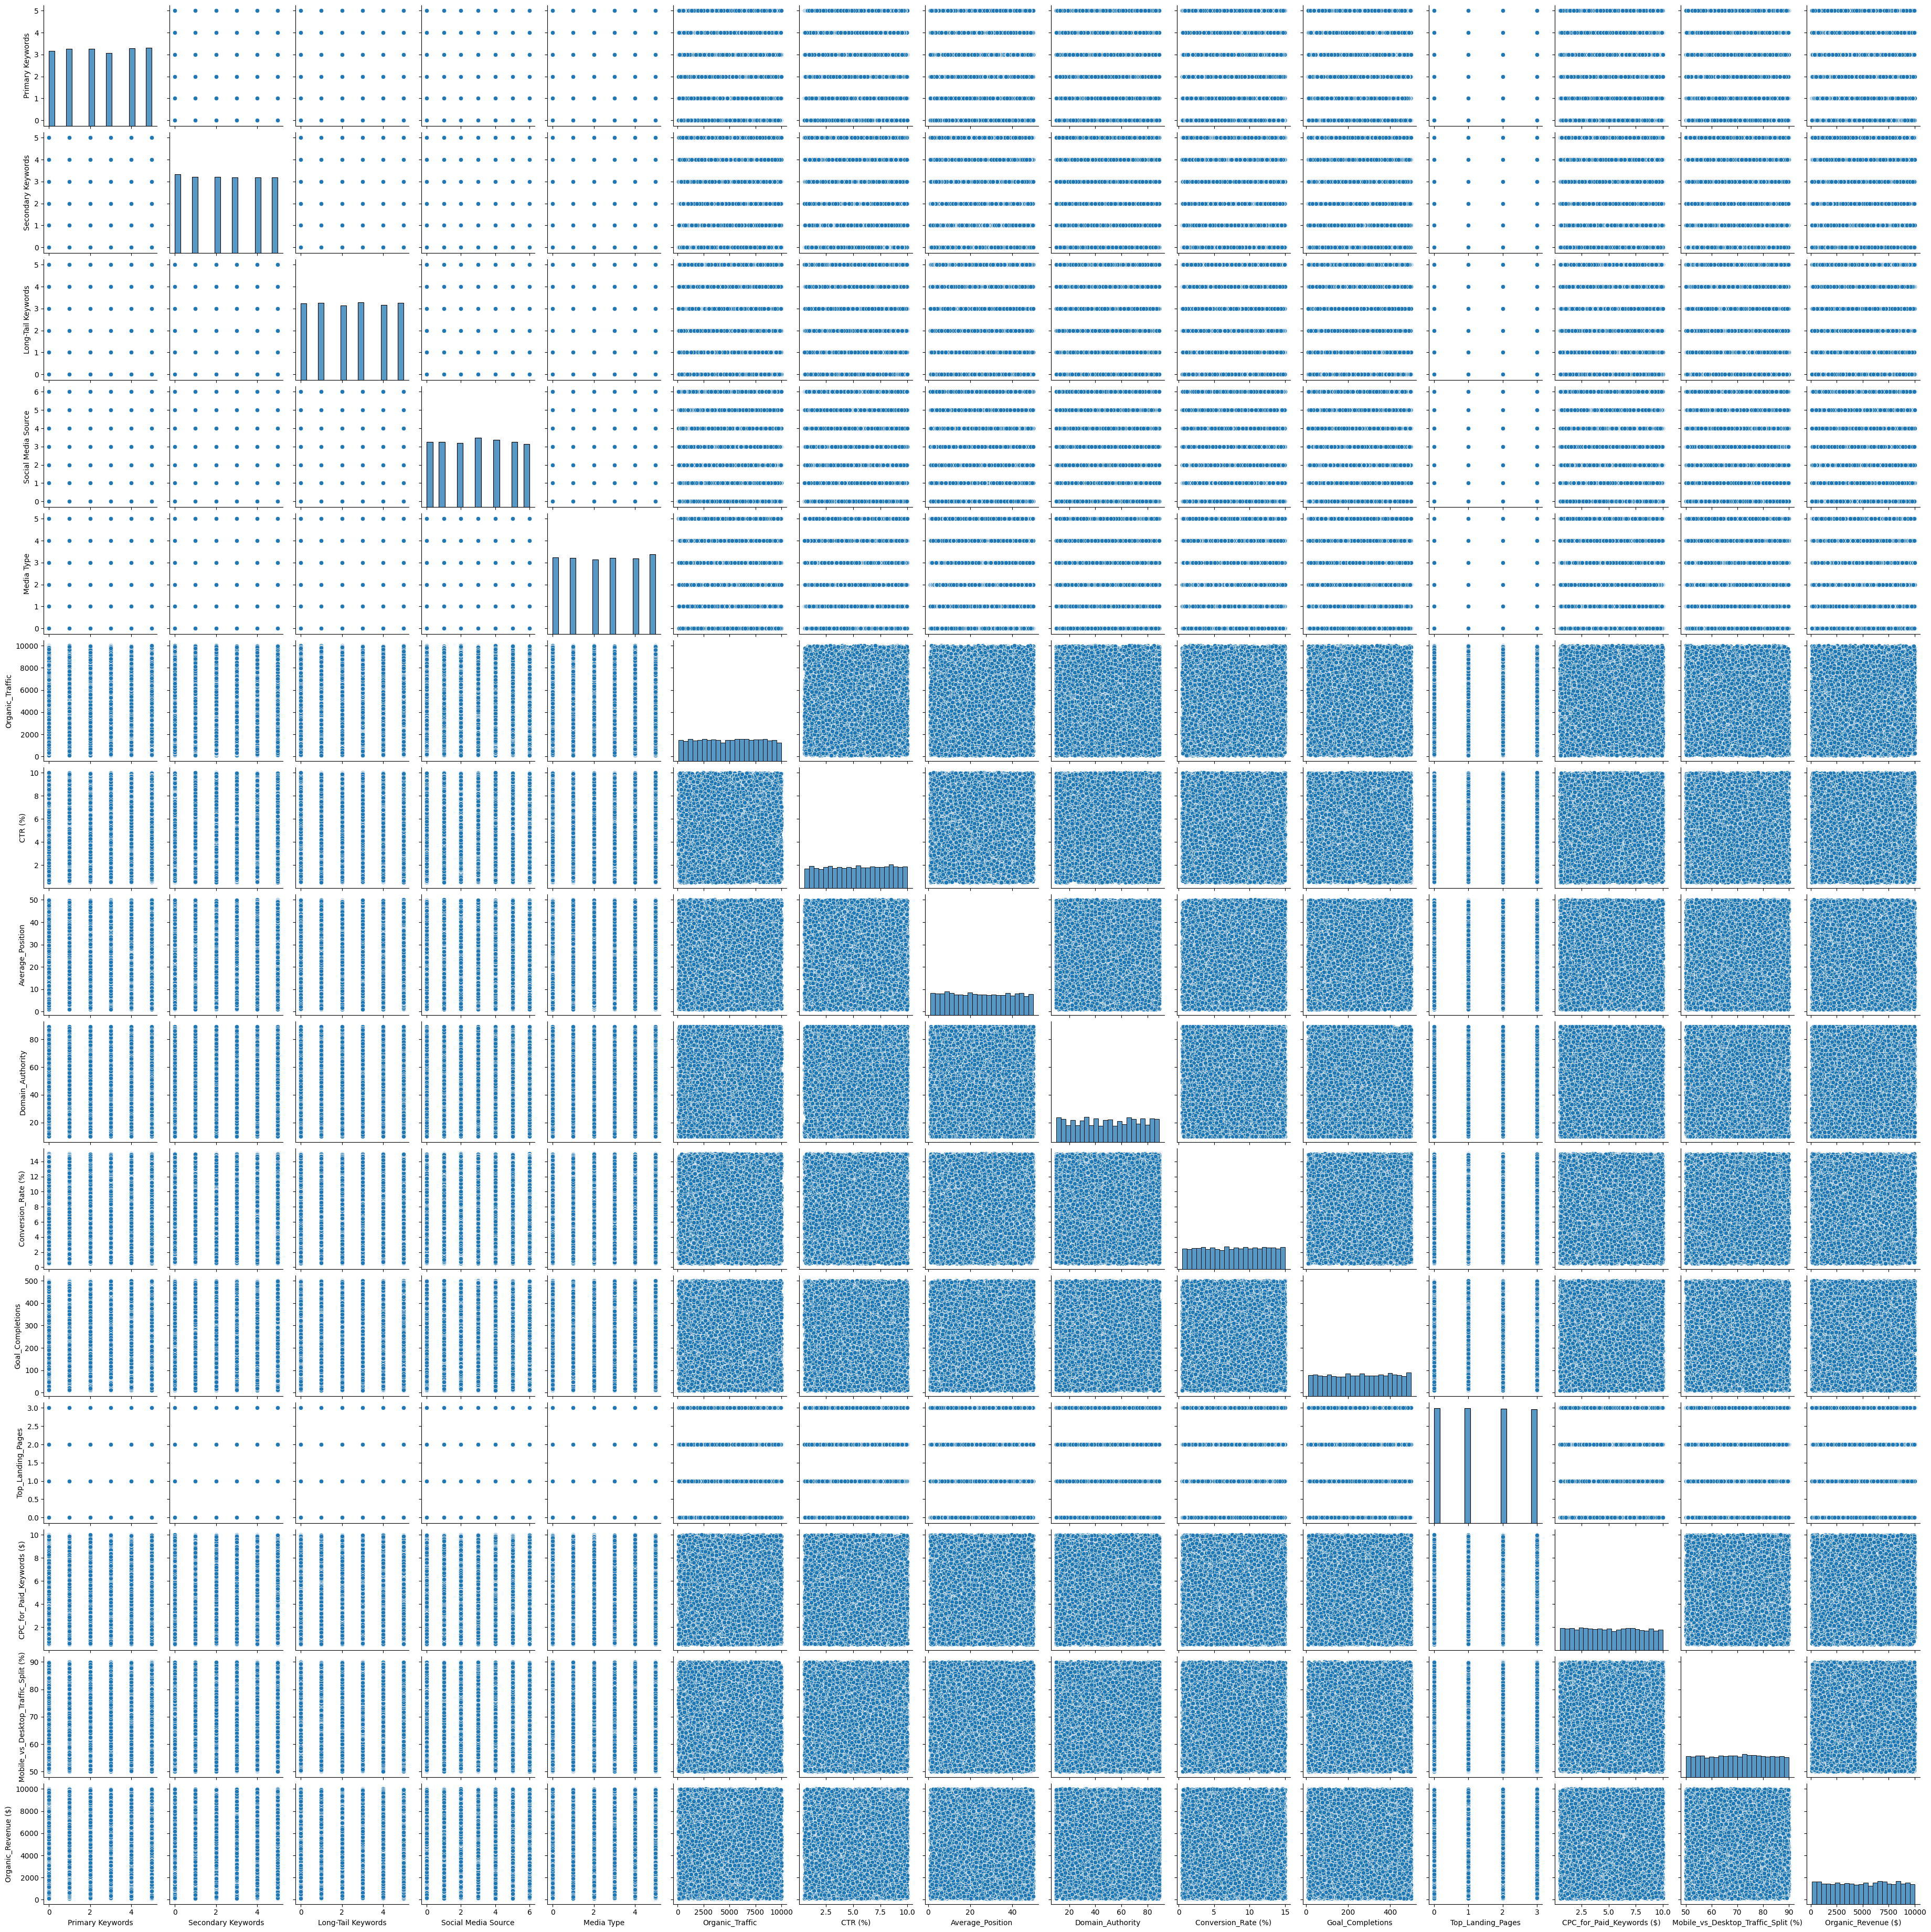

In [65]:
# Построение графиков попарных зависимостей
sns.pairplot(df)
plt.show()

In [95]:
# Разделим данные на признаки и целевую переменную
X = df.drop('CPC_for_Paid_Keywords ($)', axis=1)
y = df['CPC_for_Paid_Keywords ($)']

In [96]:
# Производим разделение на тренировочную и тестовую выборки, а также фиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Константное предсказание (среднее значение)
mean_prediction = y_train.mean()
y_train_constant = [mean_prediction] * len(y_train)
y_test_constant = [mean_prediction] * len(y_test)

# Оценка качества
mae_constant = mean_absolute_error(y_test, y_test_constant)
mse_constant = mean_squared_error(y_test, y_test_constant)
r2_constant = r2_score(y_test, y_test_constant)

print(f'Константное предсказание MAE: {mae_constant}, MSE: {mse_constant}, R2: {r2_constant}')


Константное предсказание MAE: 2.390365155077539, MSE: 7.535802952882857, R2: -0.0006568739593115769


In [102]:
# Обучение бейзлайн-модели
# Масштабирование данных (при необходимости)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем линейную регрессию
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test_scaled)


In [103]:
# Оценка качества модели
mae_model = mean_absolute_error(y_test, y_pred)
mse_model = mean_squared_error(y_test, y_pred)
r2_model = r2_score(y_test, y_pred)

print(f'Бейзлайн модель (Линейная регрессия) - MAE: {mae_model}, MSE: {mse_model}, R2: {r2_model}')


Бейзлайн модель (Линейная регрессия) - MAE: 2.3935547282719836, MSE: 7.561691000287434, R2: -0.004094470822014085
